In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 8
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1155 		 0.1 		 0.1 |
| 1034 		 0.1 		 0.1 |
| 1019 		 0.1 		 0.1 |
| 1080 		 0.1 		 0.1 |
| 1069 		 0.1 		 0.1 |
| 1011 		 0.1 		 0.1 |
| 1070 		 0.1 		 0.1 |
| 1067 		 0.1 		 0.1 |
| 1650 		 0.1 		 0.1 |
| 1103 		 0.1 		 0.1 |
| 1153 		 0.1 		 0.1 |
| 1019 		 0.1 		 0.1 |
| 1019 		 0.1 		 0.1 |
| 1004 		 0.1 		 0.1 |
| 1039 		 0.1 		 0.1 |
| 1057 		 0.1 		 0.1 |
| 1025 		 0.1 		 0.1 |
| 1006 		 0.1 		 0.1 |
| 1009 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 100.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1093
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


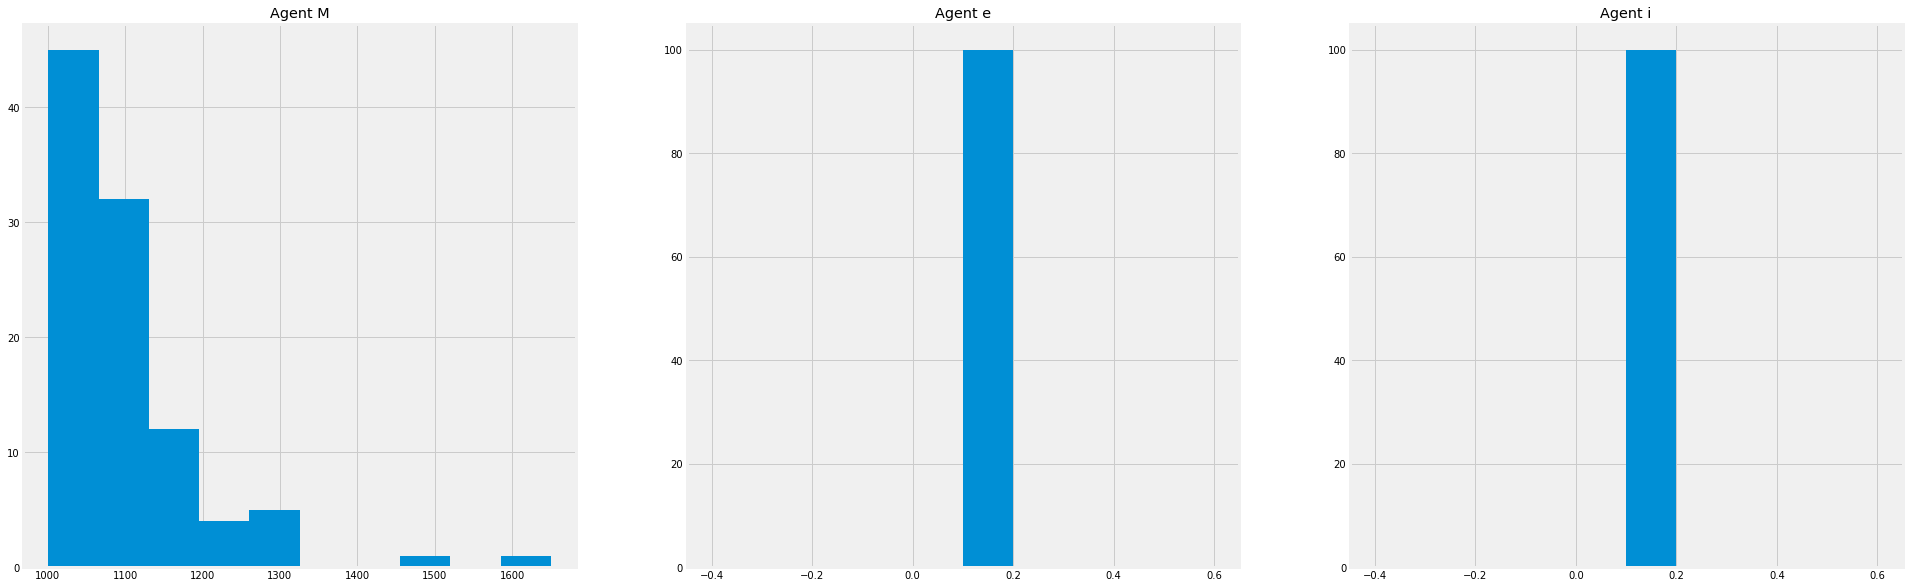

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 93.0, Temptation: 103.0, Sucker: -10.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 104.0, Temptation: 116.0, Sucker: -12.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 92.0, Temptation: 102.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 104.0, Temptation: 116.0, Sucker: -12.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 97.0, Temptation: 108.0, Sucker: -11.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 104.0, Temptation: 116.0,

In [2]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = ["power",1000, 10]
E = [0.1, 1/10000]
I = [0.1, 1/10000]
power_distance = [M,E,I]

agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 25 minutes.
    S.D.  Counts Seed
0    0.5     276    8
1    0.6     258    8
2    0.7     241    8
3    0.8     217    8
4    0.9     214    8
5    1.0     180    8
6    1.1     147    8
7    1.2     123    8
8    1.3     114    8
9    1.4     118    8
10   1.5     116    8
11   1.6      97    8
12   1.7      91    8
13   1.8      68    8
14   1.9      57    8
15   2.0      38    8
16   2.1      25    8
17   2.2      16    8
18   2.3      11    8
19   2.4       4    8
20   2.5       3    8
21   2.6       4    8
22   2.7       2    8
23   2.8       1    8
24   2.9       3    8
25   3.0       4    8


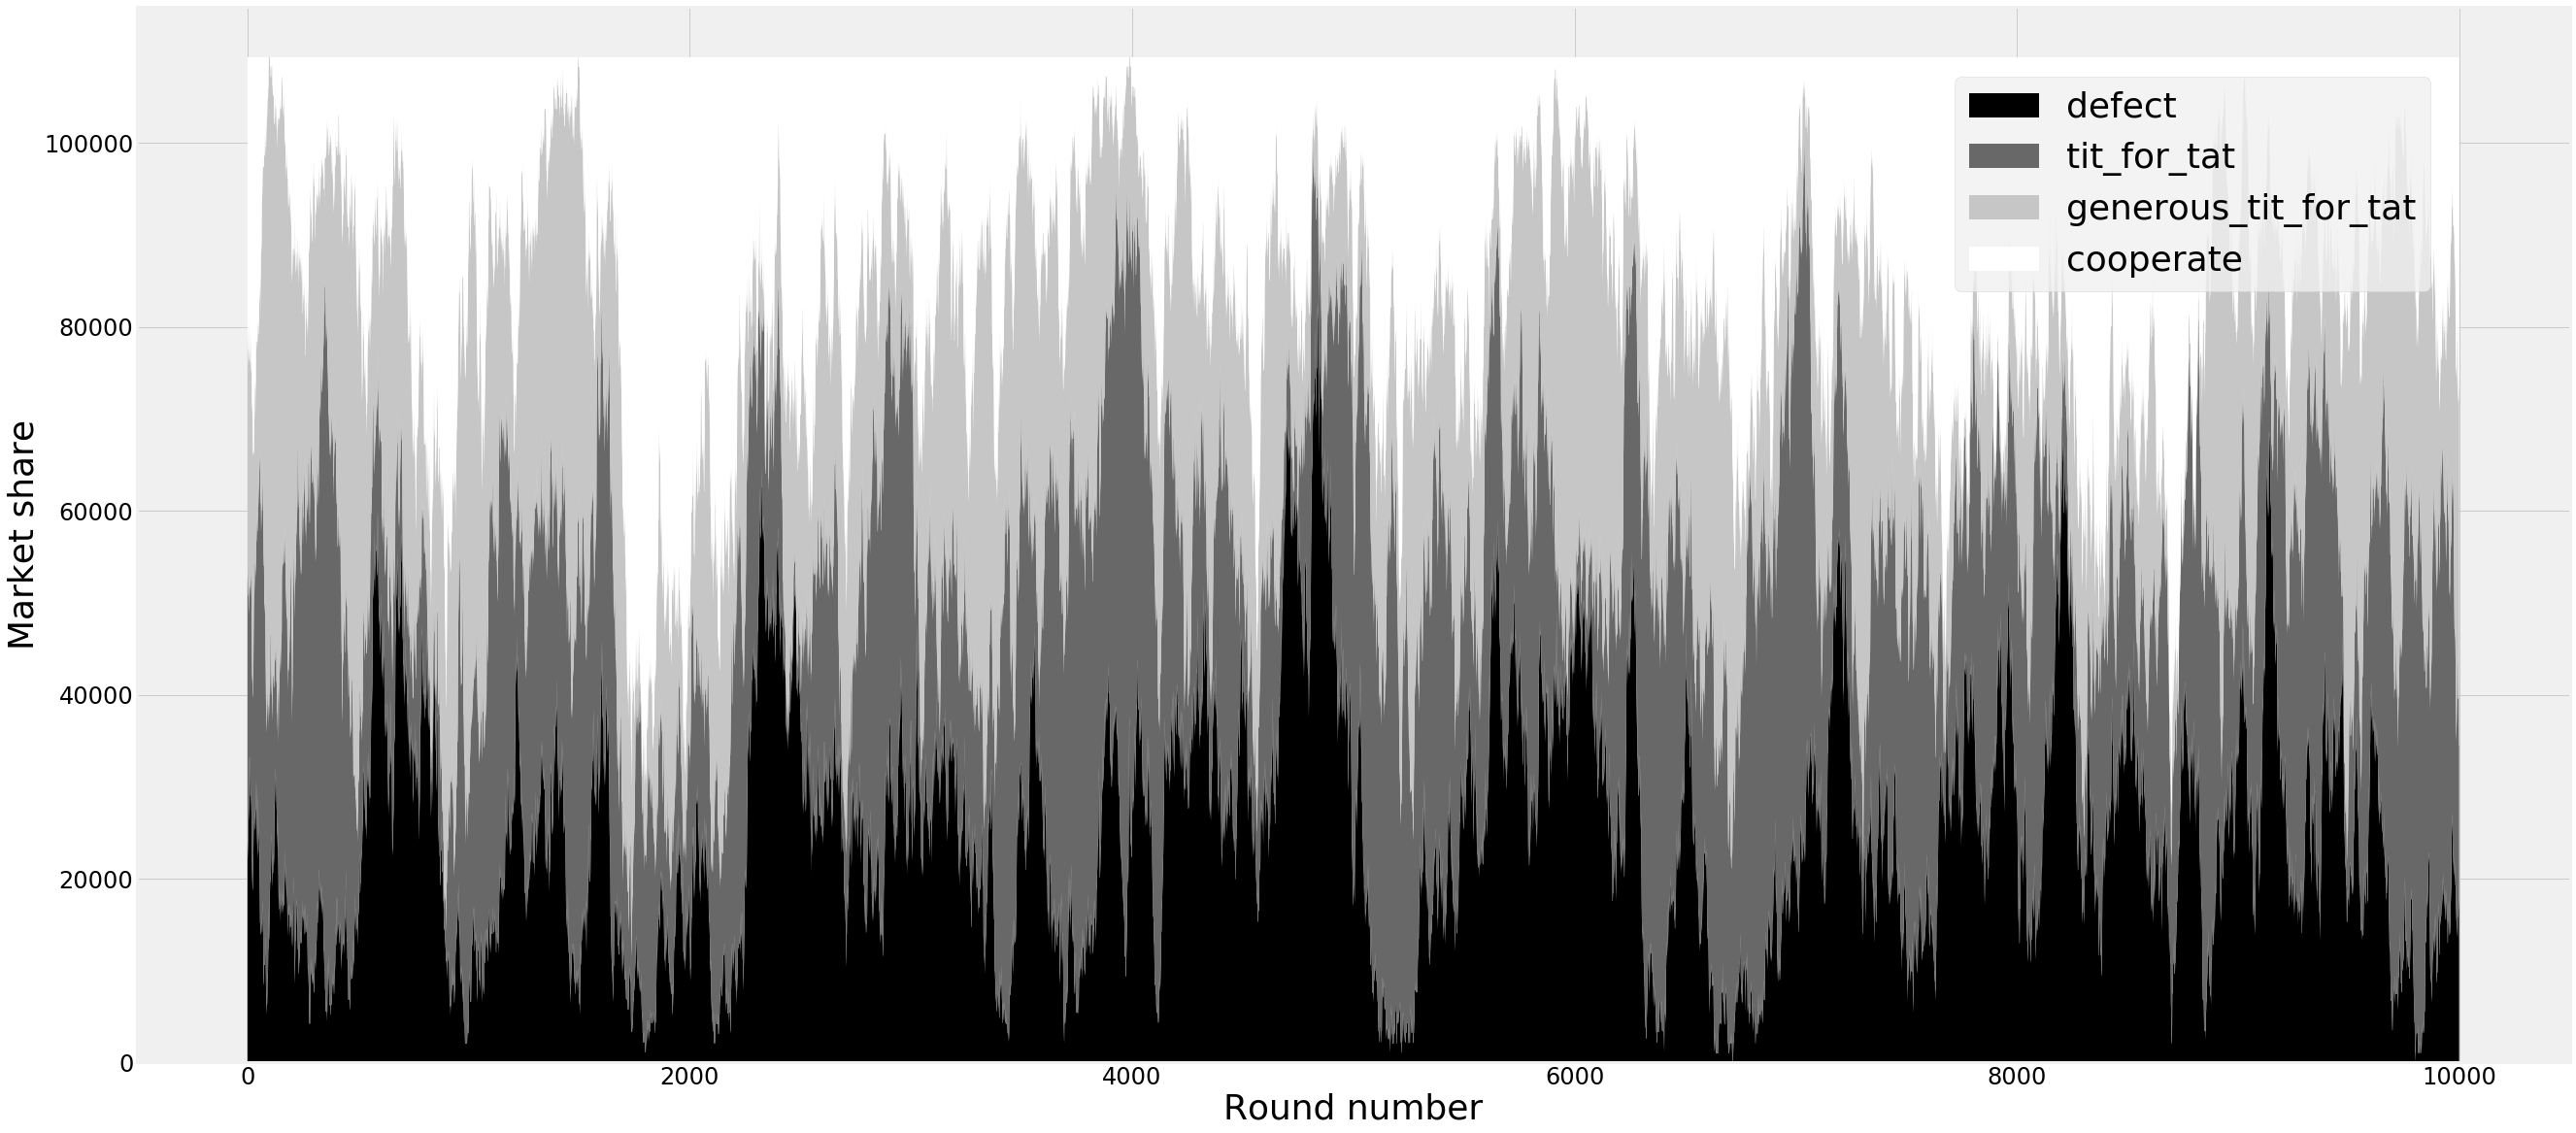

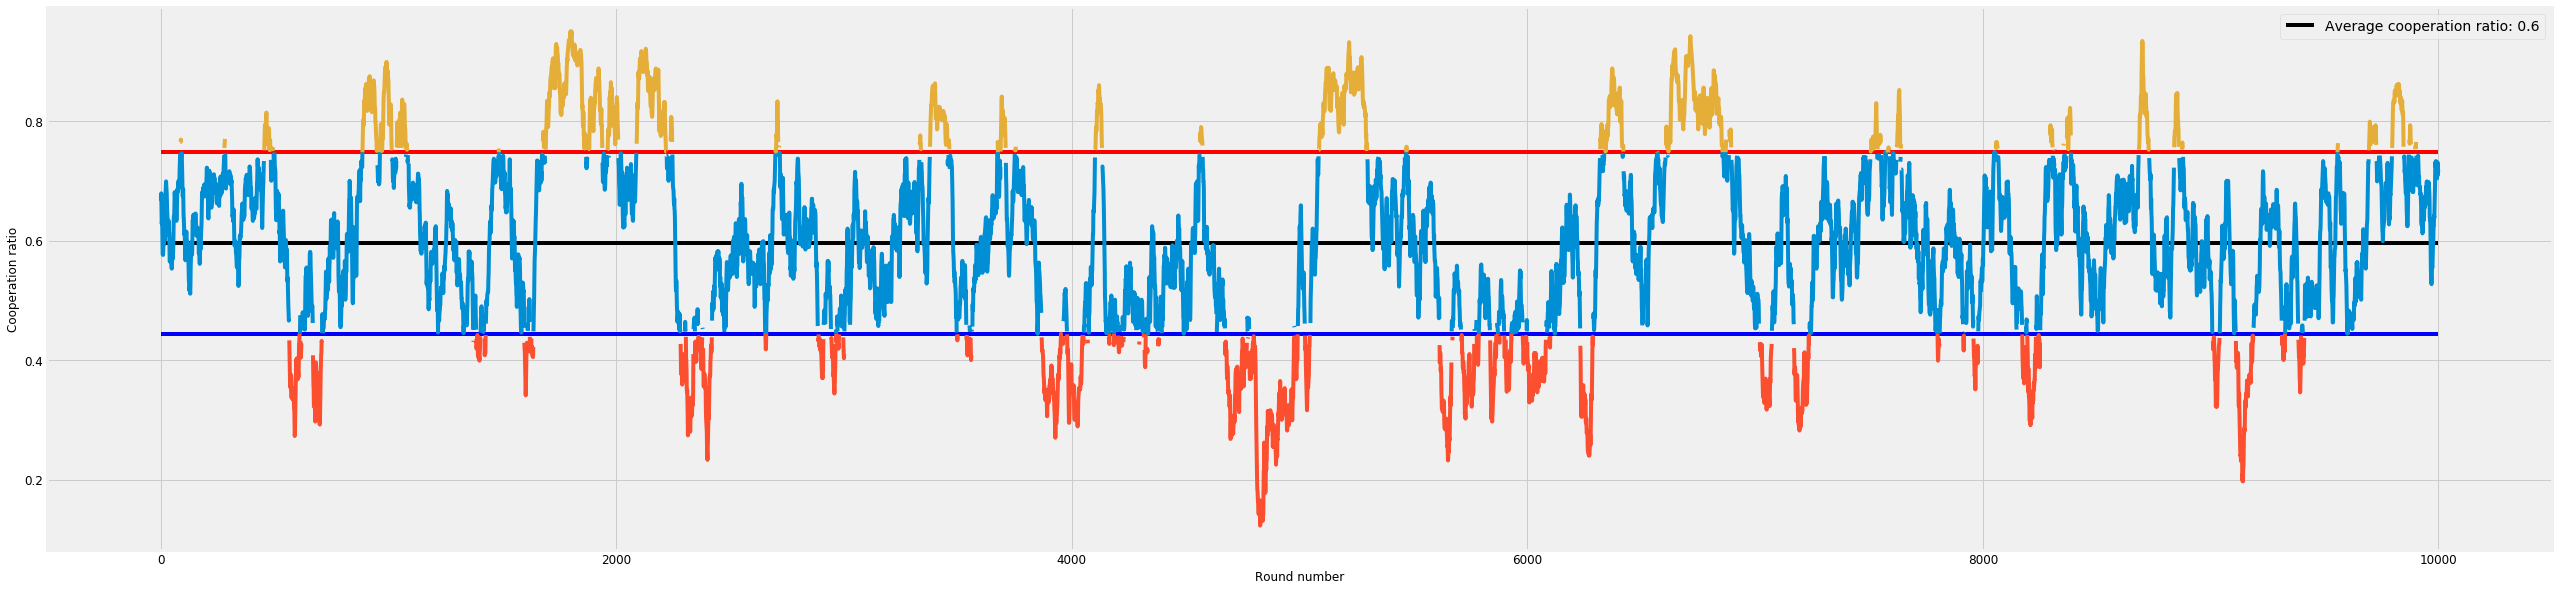

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_power_law_M", seed = str(seed))